# **Simplified Machine Learning Project checklist:**
*We should write this checklist on the whiteboard before the workshop*

**Get the data**
1. Import essential libraries
2. Load the data
3. Check the size and type of data
4. Sample a test set, put it aside, and never look at it

**Explore the data**
1. Create a copy of the data for exploration
2. Study each column and its characteristics
    - Data Type (Numeric or Categorical)
    - Identify the target variable
3. Visualize the data
4. Study the correlations between attributes.

**Prepare the Data**

*(Apply what we do on the train set to the test set)*
1. Split the train set and test set into indepedent variables and dependent variable
2. Data cleaning (We will provide a fairly clean dataset for now)
3. Feature selection: Drop the attributes that provide no useful information for the task.
4. Convert categorical columns to numeric columns (dummy variables)
5. Feature scaling: Standardize or normalize features.

**Machine Learning (Simplified)**
1. Train the model on the training set
2. Make predictions on the test set
3. Evaluate the accuracy of the model

# Get the Data

1. Import essential libraries

In [ ]:
# Data manipulation
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

2. Load the data

[Click this link to download the dataset](https://drive.google.com/file/d/1um2_vXuRmNZViSP8uBQX-1hoKI4KhgiQ/view?usp=sharing)

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving library.csv to library (1).csv


In [ ]:
import io
 
df = pd.read_csv(io.BytesIO(uploaded['library.csv']))
df

,checking_hour,hour,minute,day_of_week,room,capacity,floor,status
0,6,12,0,0,436,4,4,0
1,6,12,15,0,436,4,4,0
2,6,15,0,0,436,4,4,0
3,6,11,30,0,436,4,4,0
4,6,12,30,0,436,4,4,0
...,...,...,...,...,...,...,...,...
18412,12,21,0,6,520D,2,5,1
18413,12,21,15,6,520D,2,5,1
18414,12,21,30,6,520D,2,5,1
18415,12,19,15,6,520D,2,5,1


3. Check the size and type of data

In [ ]:
# Check the number of rows and columns of the dataset
df.shape

(18417, 8)

In [ ]:
# Check the data type for each column
df.dtypes

checking_hour     int64
hour              int64
minute            int64
day_of_week       int64
room             object
capacity          int64
floor             int64
status            int64
dtype: object

4. Sample a test set and put it aside

Split the dataset into 1 train set and 1 test set. 80% of the original data will be in the train set and 20% of the original data will be in the test set

In [ ]:
# Import train_test_split
from sklearn.model_selection import train_test_split

# Split
train_set, test_set = train_test_split(df, test_size=0.2, random_state=101)

# Explore the data

1. Create a copy of the data for exploration

In [ ]:
train_copy = train_set.copy()

2. Study each column and its characteristics

a. Which variables are Continuous? Which variables are categorical

In [ ]:
train_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14733 entries, 12905 to 13151
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   checking_hour  14733 non-null  int64 
 1   hour           14733 non-null  int64 
 2   minute         14733 non-null  int64 
 3   day_of_week    14733 non-null  int64 
 4   room           14733 non-null  object
 5   capacity       14733 non-null  int64 
 6   floor          14733 non-null  int64 
 7   status         14733 non-null  int64 
dtypes: int64(7), object(1)
memory usage: 1.0+ MB


b. Which variable is the target variable?

3. Visualize the data

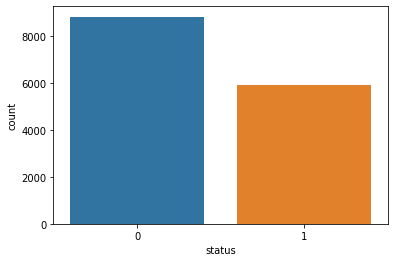

In [ ]:
sns.countplot(data=train_copy, x='status')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7efbe1770210>,
      dtype=object)

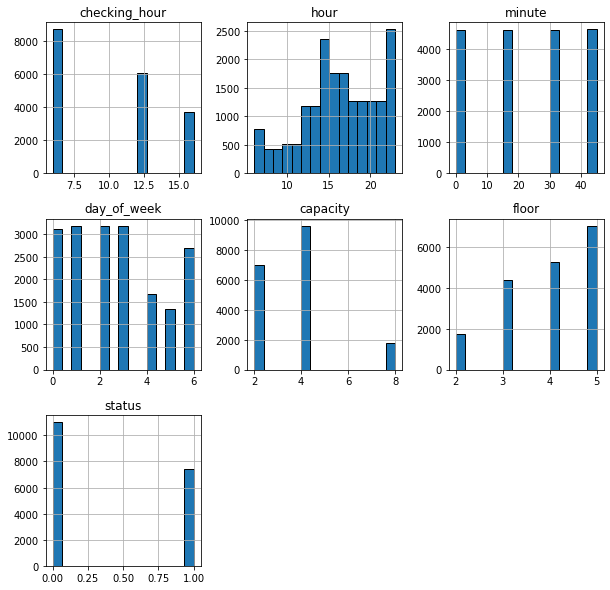

In [ ]:
train_copy.hist(bins=15, edgecolor='black', figsize=(10,10))

Text(0.5, 1.0, 'Availability percentage by hour')

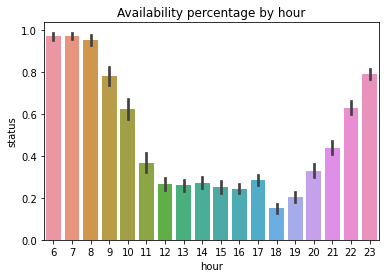

In [ ]:
sns.barplot(data=train_copy, x='hour', y='status')
plt.title("Availability percentage by hour")

Text(0.5, 1.0, 'Availability percentage by week day')

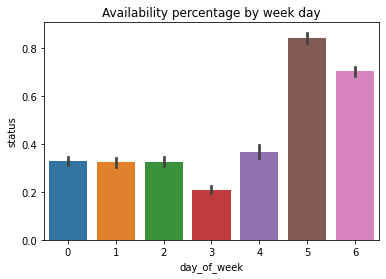

In [ ]:
sns.barplot(data=train_copy, x='day_of_week', y='status')
plt.title('Availability percentage by week day')

Text(0.5, 1.0, 'Availability percentage by room')

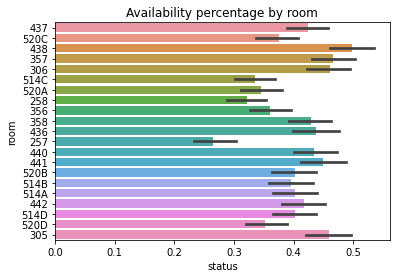

In [ ]:
sns.barplot(data=train_copy, y='room', x='status', orient='h', )
plt.title('Availability percentage by room')

Text(0.5, 1.0, '(Sorted) Availability percentage by room')

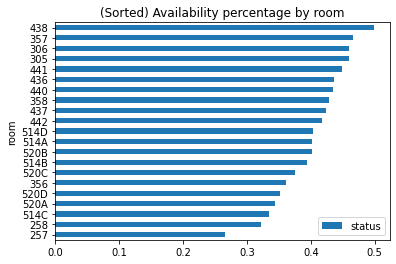

In [ ]:
train_copy.groupby('room')['status'].mean().reset_index().sort_values(by='status').plot(kind='barh', x='room', y='status')
plt.title('(Sorted) Availability percentage by room')

Text(0.5, 1.0, 'Availability percentage by checking hour')

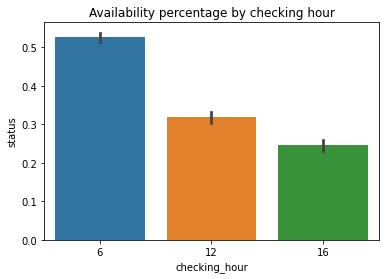

In [ ]:
sns.barplot(data=train_copy, x='checking_hour', y='status')
plt.title('Availability percentage by checking hour')

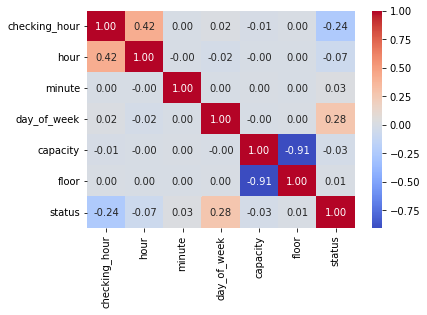

In [ ]:
sns.heatmap(train_copy.corr(), cmap='coolwarm', annot=True, fmt='.2f')

# Prepare the data

We will do step 1, 4, and 5. Step 2 and 3 will be saved for the intermediate workshop next semester
- Step 1: Split the train set and test set into indepedent variables and dependent variable
- Step 4: Convert categorical variables to dummy variables
- Step 5: Scale the dataset

In [ ]:
# Split the train set and test set into indepedent variables and dependent variable
X_train = train_set.drop('status', axis=1)
y_train = train_set['status']

X_test = test_set.drop('status', axis=1)
y_test = test_set['status']

Convert categorical variables to dummy variables

In [ ]:
# Import OneHotEncoder
from sklearn.preprocessing import OneHotEncoder

# Convert categorical variables to dummy variables
encode = OneHotEncoder()
encode.fit(X_train)
X_train = encode.transform(X_train).toarray()
X_test = encode.transform(X_test).toarray()

In [ ]:
# Import StandardScaler
from sklearn.preprocessing import StandardScaler

# Scale the dataset
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Machine Learning 

In [ ]:
# Import evaluation tools
from sklearn.metrics import classification_report, confusion_matrix

Decision Tree model

In [ ]:
# Import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

# Initiate the model
tree = DecisionTreeClassifier()

# Train the model
tree.fit(X_train, y_train)

# Make predictions
predictions = tree.predict(X_test)

# Evaluate the model
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

[[2046  162]
 [ 135 1341]]
              precision    recall  f1-score   support

           0       0.94      0.93      0.93      2208
           1       0.89      0.91      0.90      1476

    accuracy                           0.92      3684
   macro avg       0.92      0.92      0.92      3684
weighted avg       0.92      0.92      0.92      3684



Logistic Regression model

In [ ]:
# Import LogisticRegression
from sklearn.linear_model import LogisticRegression

# Initiate the model
logreg = LogisticRegression()

# Train the model
logreg.fit(X_train, y_train)

# Make predictions
predictions = logreg.predict(X_test)

# Evaluate the model
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

[[1972  236]
 [ 321 1155]]
              precision    recall  f1-score   support

           0       0.86      0.89      0.88      2208
           1       0.83      0.78      0.81      1476

    accuracy                           0.85      3684
   macro avg       0.85      0.84      0.84      3684
weighted avg       0.85      0.85      0.85      3684

